In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils.find_map import msi_map

plt.style.use('seaborn-v0_8')  # Changed style

In [2]:
obj = msi_map('/Users/Serkan/Desktop/Academia/KUL/Thesis/Data/M2')

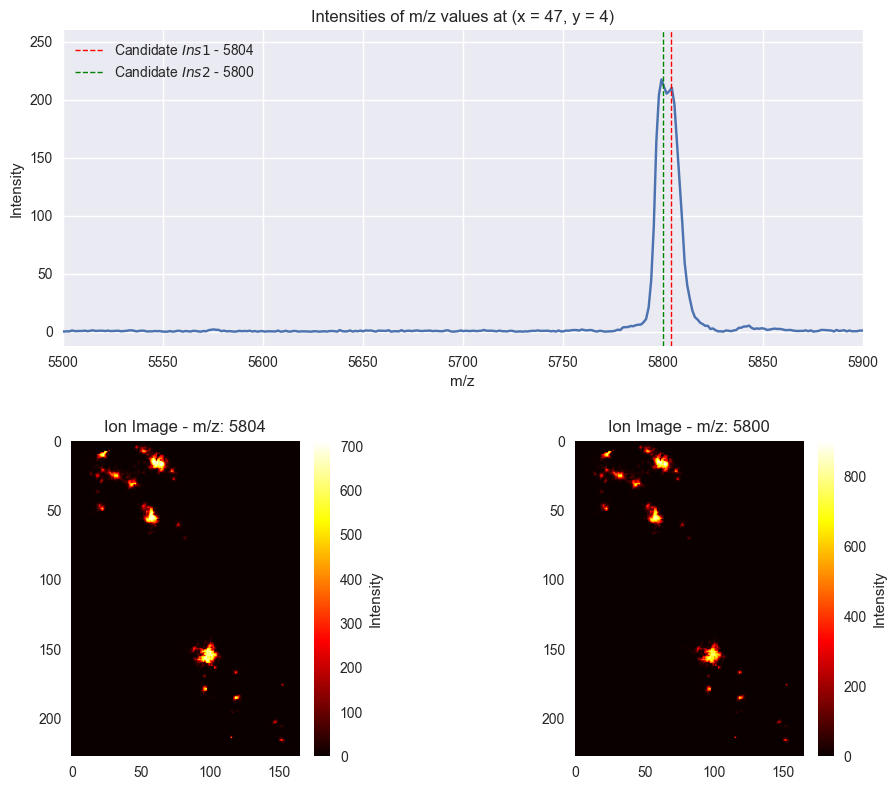

In [4]:
obj.plot_islet_mz(vertical_1 = 5804, vertical_2 = 5800, x_limit = [5500, 5900], larger_than = 200, set_mz = True)

In [5]:
obj.set_insulin(insulin_1_mz = 5800, insulin_2_mz = 5804)

# Edge detection

In [6]:
from scipy.ndimage import convolve, gaussian_filter, binary_dilation

In [10]:
image = obj.data[obj.m_z_index_for_clustering]
kernel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
kernel_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
gaussian_smooth_sigma_dilation = 2
smoothed_image = gaussian_filter(image, sigma = gaussian_smooth_sigma_dilation)  
        
edges_x = convolve(smoothed_image, kernel_x)
edges_y = convolve(smoothed_image, kernel_y)

edges_magnitude = np.sqrt(edges_x**2 + edges_y**2)


In [11]:
image_copy_bin_ins = image.copy()
image_copy_bin_non = image.copy()
circle_map_bin_bool = obj.circle_map_bin.astype(bool)
image_copy_bin_ins[~circle_map_bin_bool] = 0 
image_copy_bin_non[circle_map_bin_bool] = 0

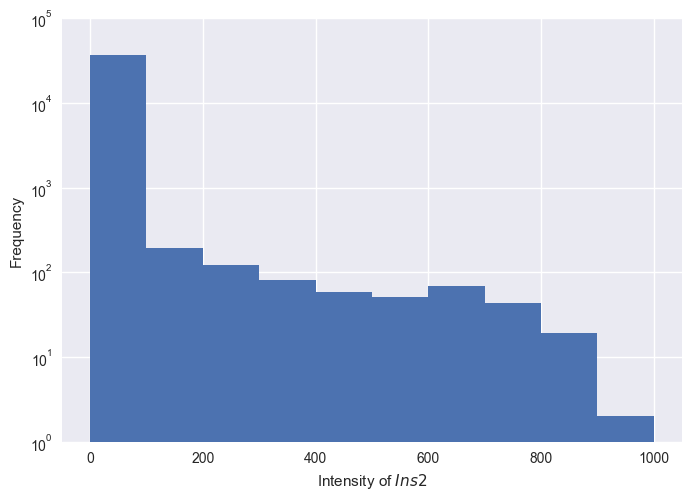

(1, 100000)

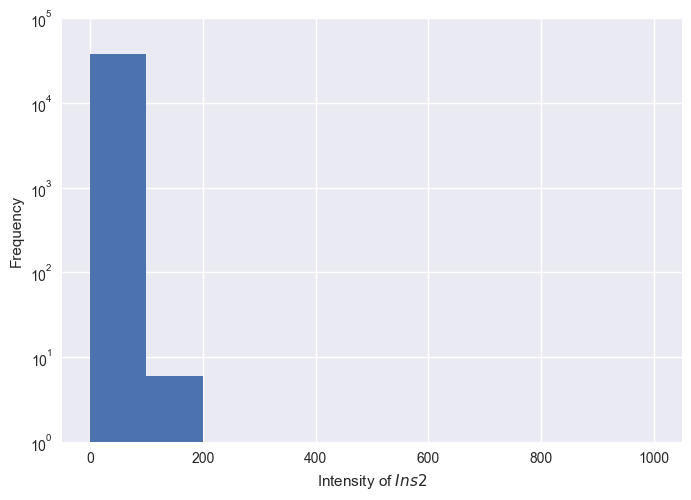

In [12]:
hist2_ins = plt.hist(image_copy_bin_ins.reshape(-1), log = True, width = 100, bins = 10, range = (0,1000))
plt.xlabel('Intensity of $Ins2$')
plt.ylabel('Frequency')
# ax.set_title('Dilation - Islet')
plt.ylim(1, 10**5)
plt.show()
hist2_ins = plt.hist(image_copy_bin_non.reshape(-1), log = True, width = 100, bins = 10, range = (0,1000))
plt.xlabel('Intensity of $Ins2$')
plt.ylabel('Frequency')
# ax.set_title('Dilation - Islet')
plt.ylim(1, 10**5)

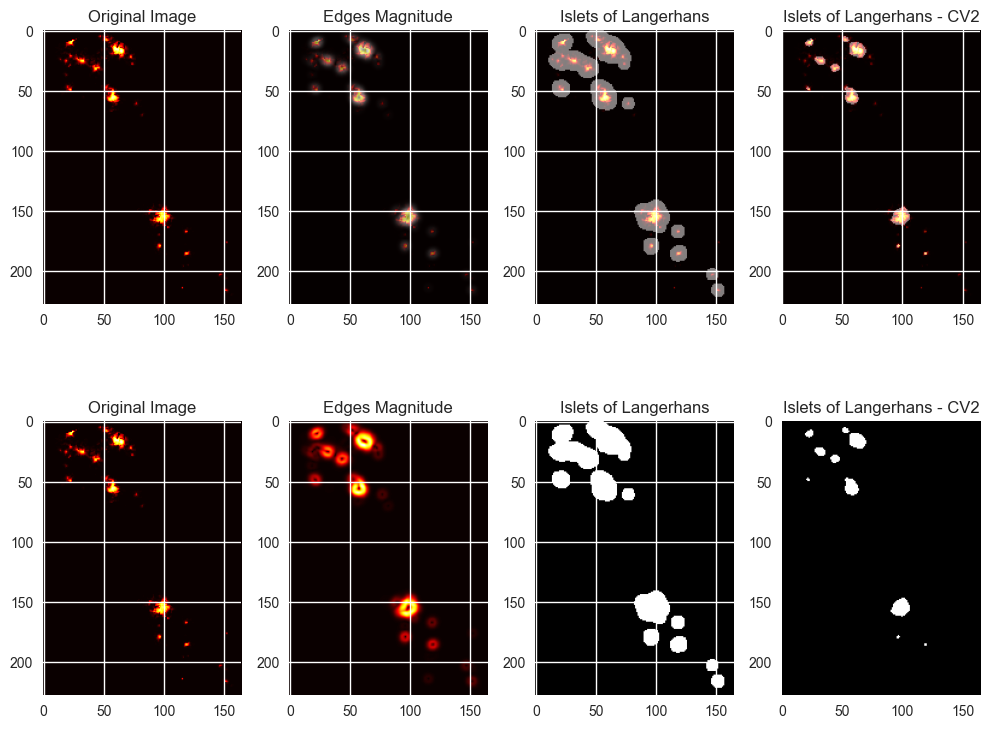

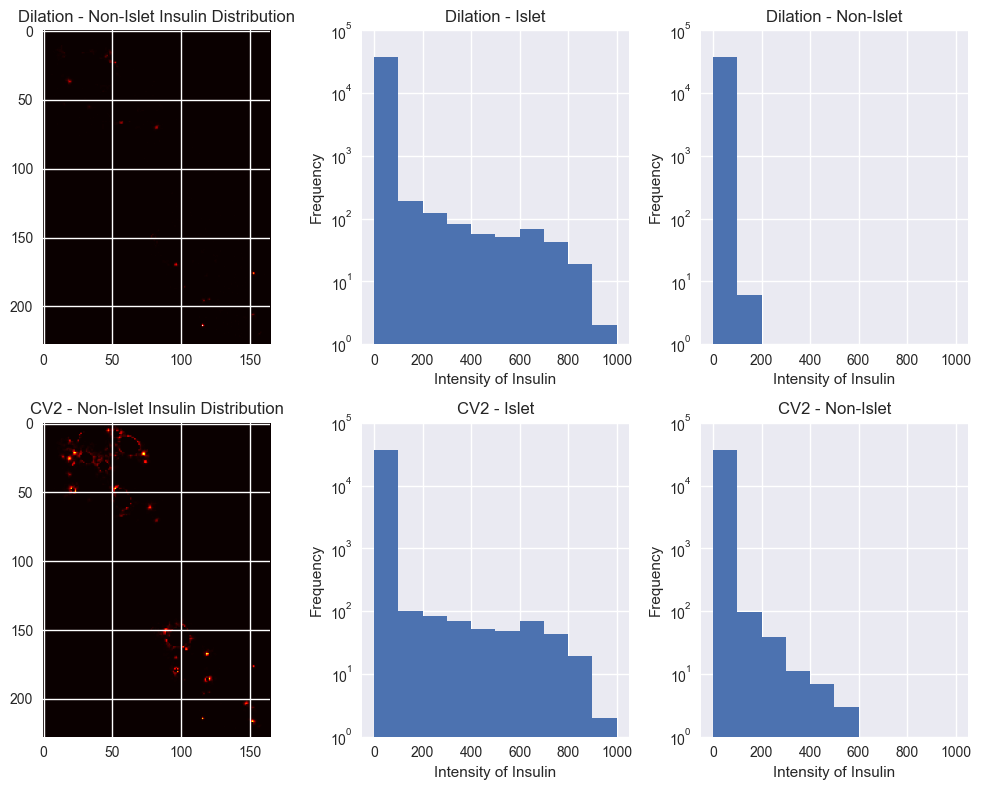

In [8]:
gaussian_smooth_sigma_dilation = 2
gaussian_smooth_sigma_cv2 = 2
dilation_threshold = 50
dilation_circle_size = 3 #int
islet_alpha = 0.5

obj.apply_edge_detection(mz = None, kernel_x = None, kernel_y = None,
                         gaussian_smooth_sigma_dilation = gaussian_smooth_sigma_dilation,
                         dilation_threshold= dilation_threshold, dilation_circle_size = dilation_circle_size,
                         gaussian_smooth_sigma_cv2 = gaussian_smooth_sigma_cv2, islet_alpha = islet_alpha, plot = True, plot_hist = True)
                         

# Clustering within the inital map

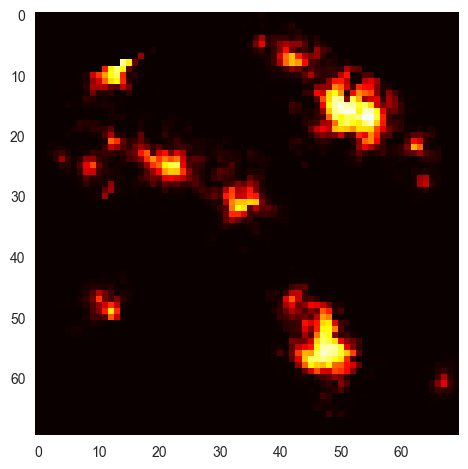

In [14]:
obj.determine_area_of_interest(x_range = (0, 70), y_range = (10,80))
# obj.determine_area_of_interest(x_range = (0, 228), y_range = (0, 165))

In [15]:
obj.prepare_for_clustering()

## kmeans

/Users/Serkan/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Serkan/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Serkan/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Serkan/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416:

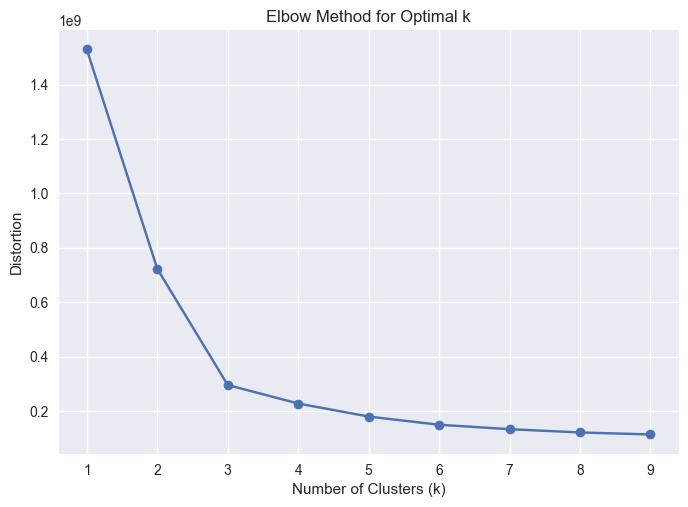

In [16]:
obj.kmeans_determine_n_component(max_component = 10)

/Users/Serkan/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


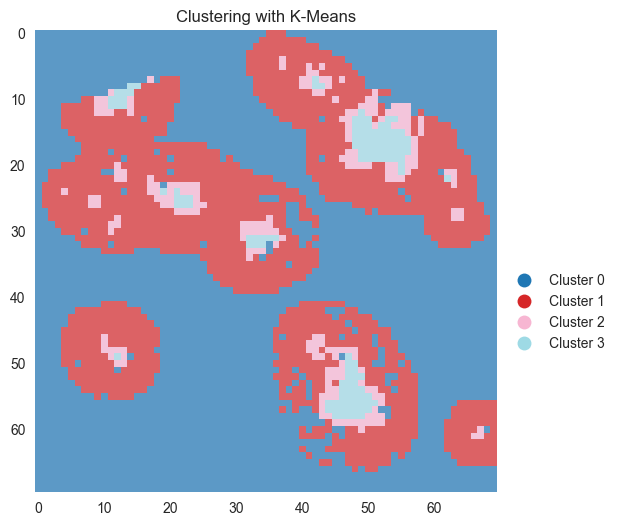

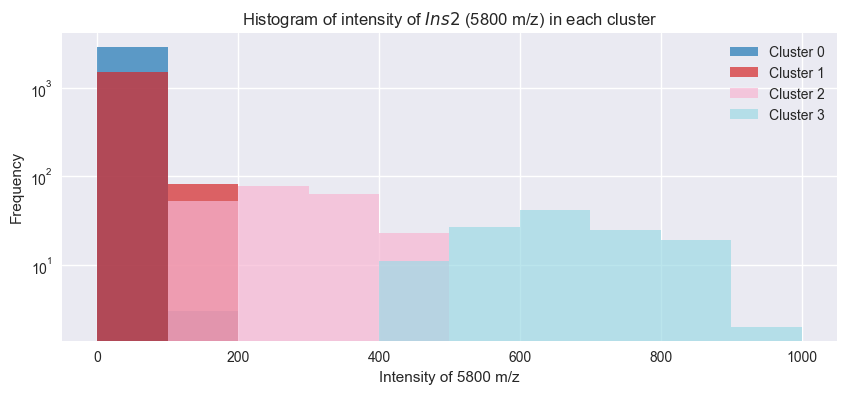

In [17]:
obj.fit_cluster_k_means(num_clusters= 4, plot = True)

## fuzzy c

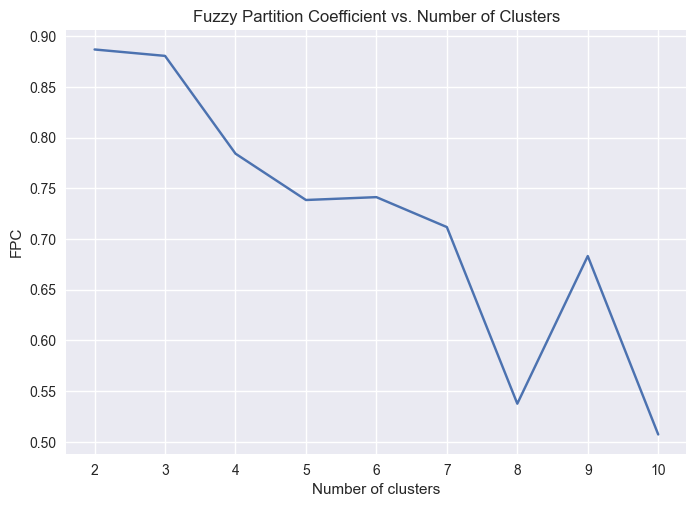

In [18]:
obj.fuzzy_k_determine_n_component(max_component = 10)

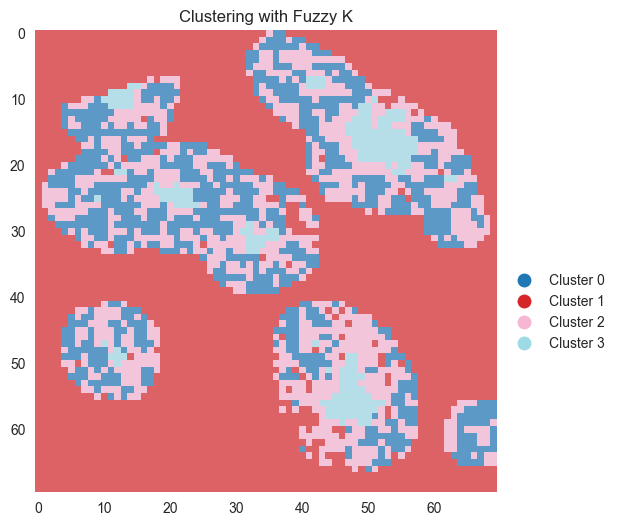

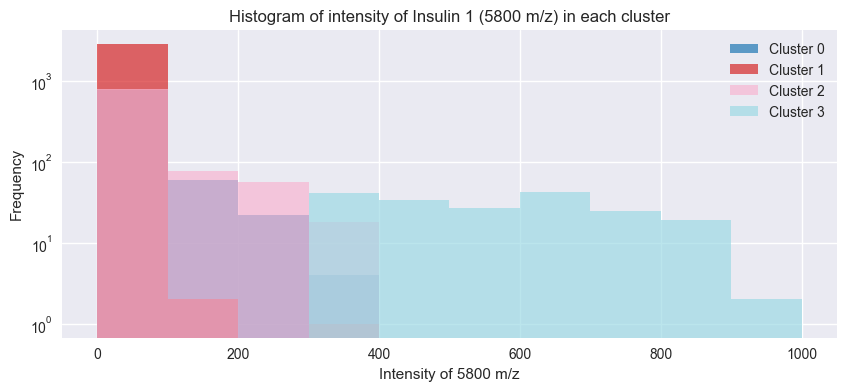

In [15]:
obj.fit_cluster_fuzzy_k(num_clusters= 4, plot = True)

## hdbscan

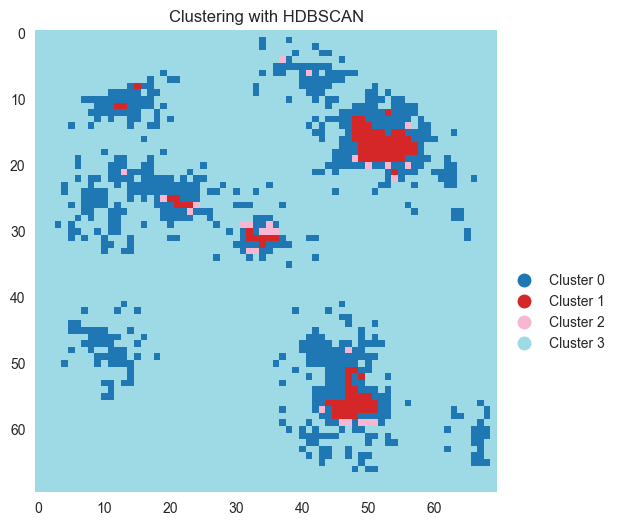

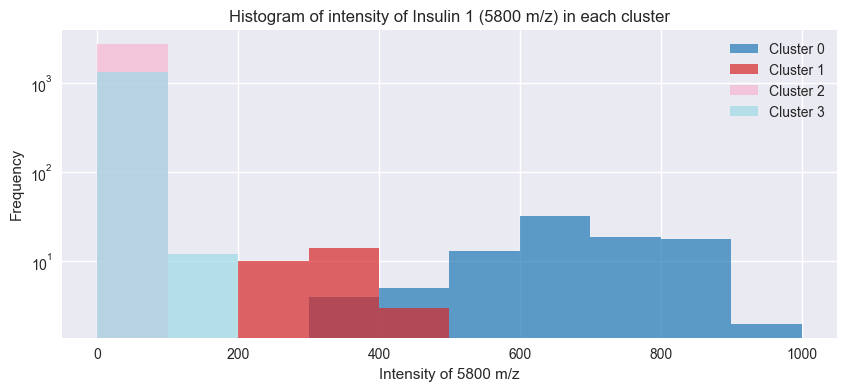

In [18]:
obj.fit_cluster_hdbscan(min_cluster_size = 5, plot = True)

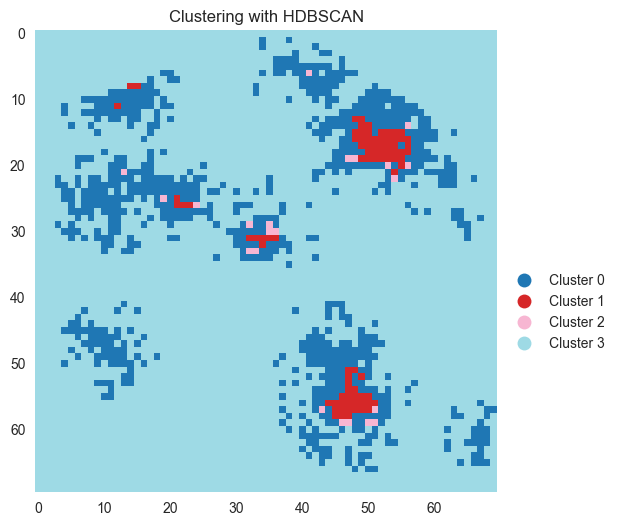

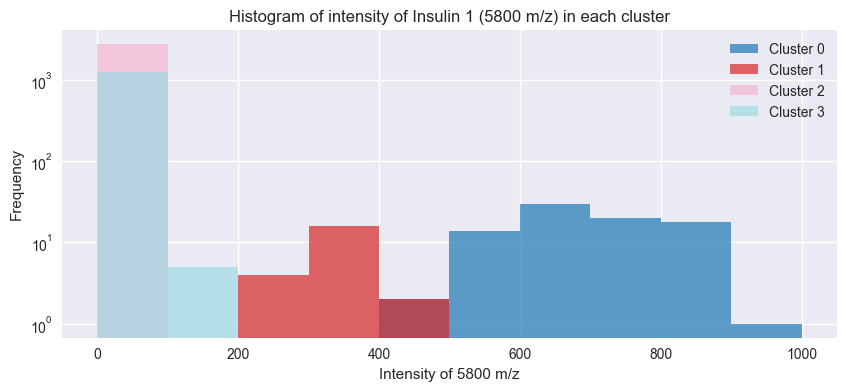

In [16]:
obj.fit_cluster_hdbscan(min_cluster_size = 7, plot = True)

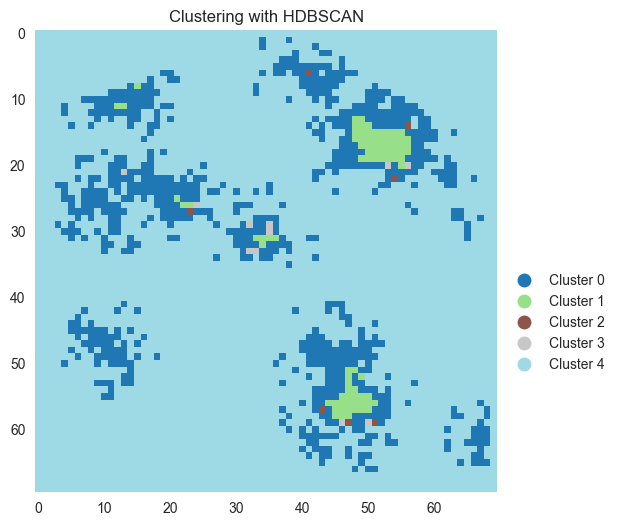

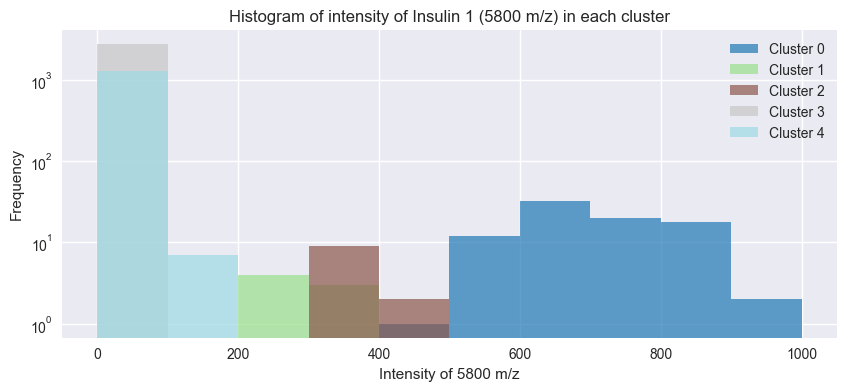

In [17]:
obj.fit_cluster_hdbscan(min_cluster_size = 6, plot = True)

# Final method

In [19]:
map_all = np.zeros(obj.data[0].shape)

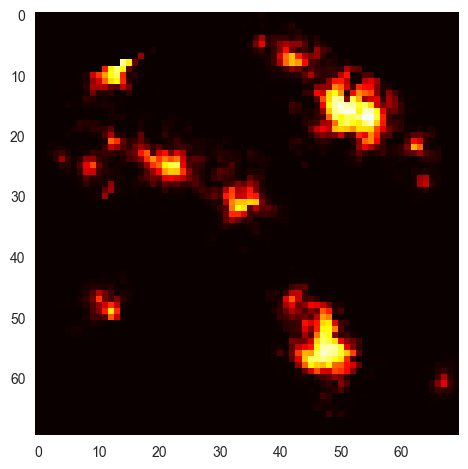

In [20]:
x_range = (0, 70)
y_range = (10, 80)

obj.determine_area_of_interest(x_range, y_range)
# obj.determine_area_of_interest(x_range = (100, 200), y_range = (75, 150))
obj.prepare_for_clustering()

/Users/Serkan/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


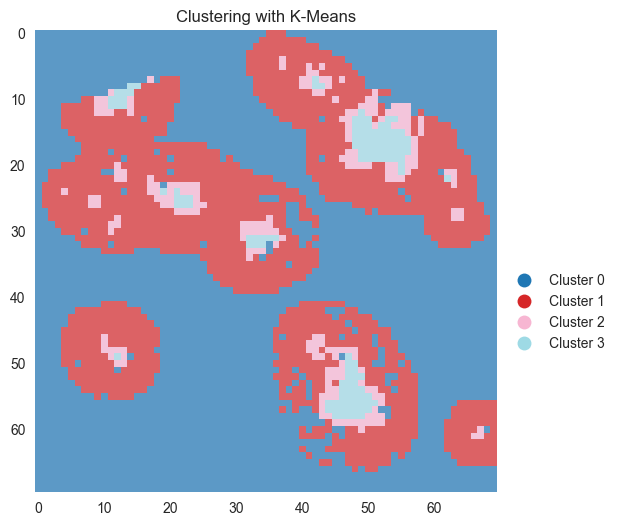

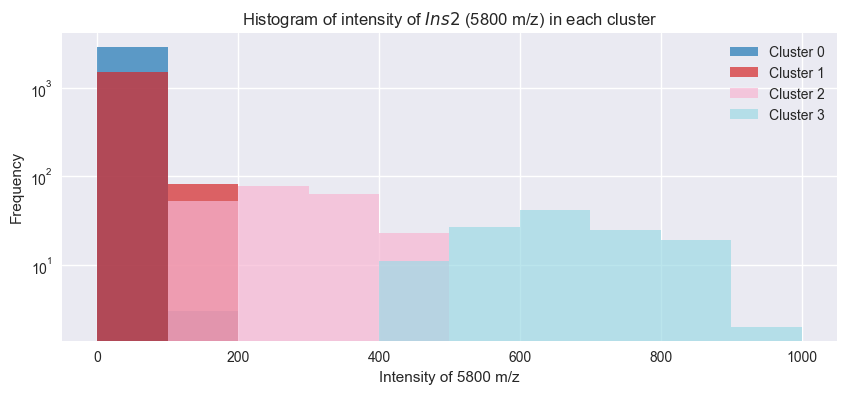

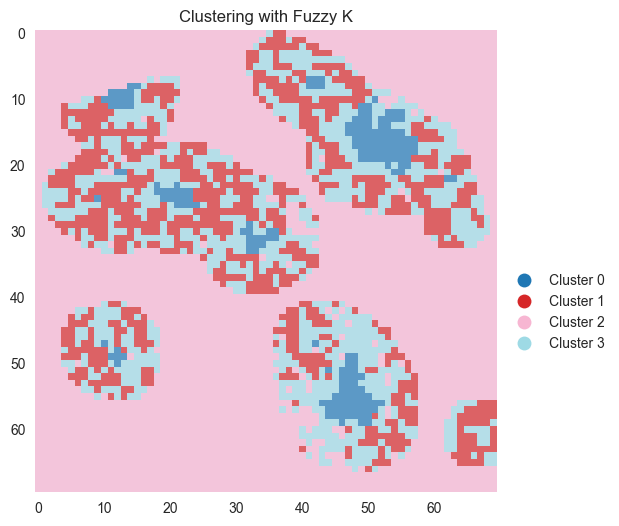

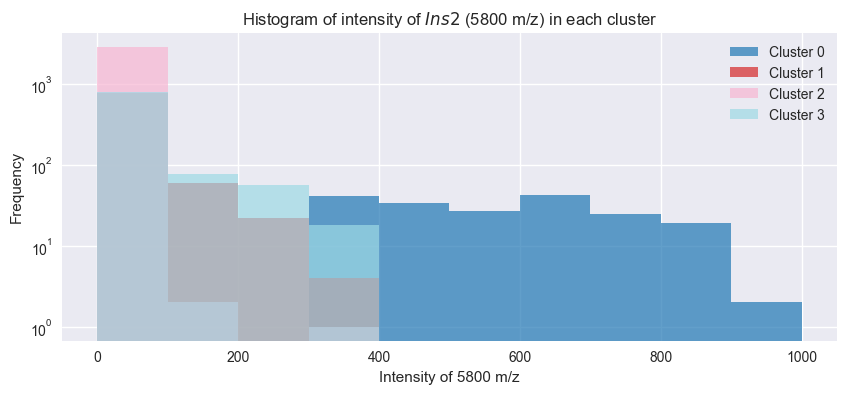

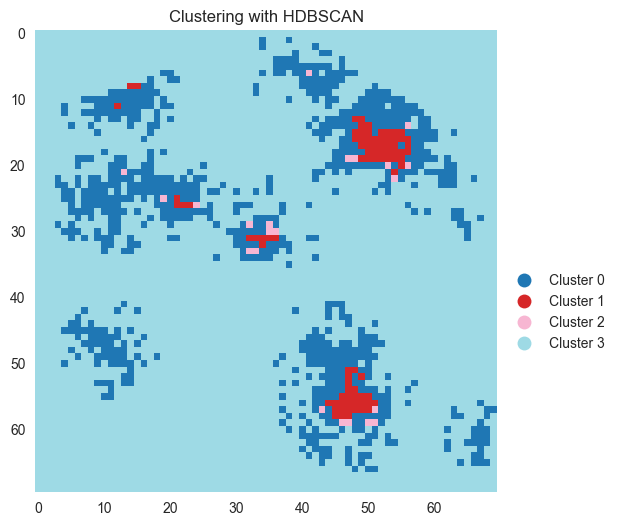

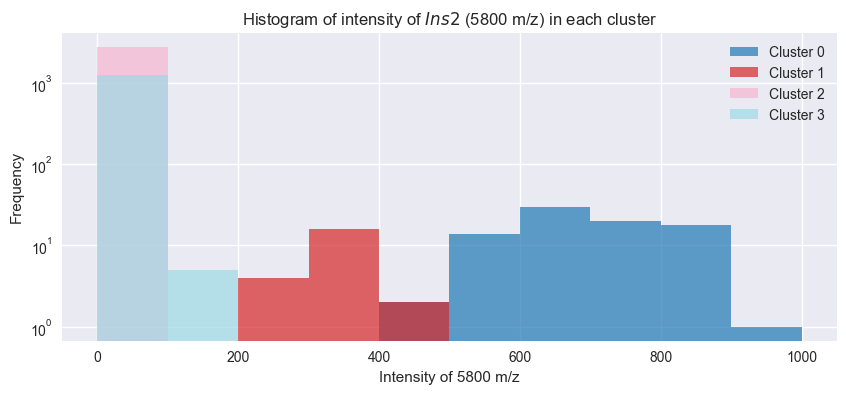

In [21]:
obj.fit_cluster_k_means(num_clusters= 4, plot = True)
obj.fit_cluster_fuzzy_k(num_clusters= 4, plot = True)
obj.fit_cluster_hdbscan(min_cluster_size = 7, plot = True)

In [22]:
delta_x = x_range[1] - x_range[0]
delta_y = y_range[1] - y_range[0]

In [23]:
map_all_kmeans = np.zeros((delta_x, delta_y))
map_all_fuzzy = np.zeros((delta_x, delta_y))
map_all_hdbscan = np.zeros((delta_x, delta_y))

indices = obj.data_to_cluster_clustered_hdbscan == 1
map_all_hdbscan[indices] = 1
indices = obj.data_to_cluster_clustered_hdbscan == 3
map_all_hdbscan[indices] = 2
indices = obj.data_to_cluster_clustered_hdbscan == 2
map_all_hdbscan[indices] = 3

indices = obj.data_to_cluster_clustered_fuzzyk == 1
map_all_fuzzy[indices] = 1
indices = obj.data_to_cluster_clustered_hdbscan == 3
map_all_fuzzy[indices] = 2
indices = obj.data_to_cluster_clustered_hdbscan == 2
map_all_fuzzy[indices] = 3

indices = obj.data_to_cluster_clustered_kmeans == 1
map_all_kmeans[indices] = 1
indices = obj.data_to_cluster_clustered_kmeans == 3
map_all_kmeans[indices] = 2
indices = obj.data_to_cluster_clustered_kmeans == 2
map_all_kmeans[indices] = 3

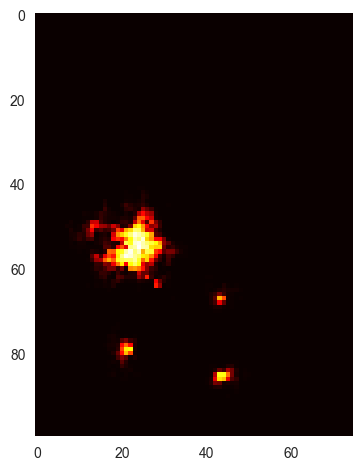

In [24]:
# obj.determine_area_of_interest(x_range = (0, 70), y_range = (10, 80))
x_range = (100,200)
y_range = (75,150)
obj.determine_area_of_interest(x_range = (100, 200), y_range = (75, 150))
obj.prepare_for_clustering()

/Users/Serkan/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


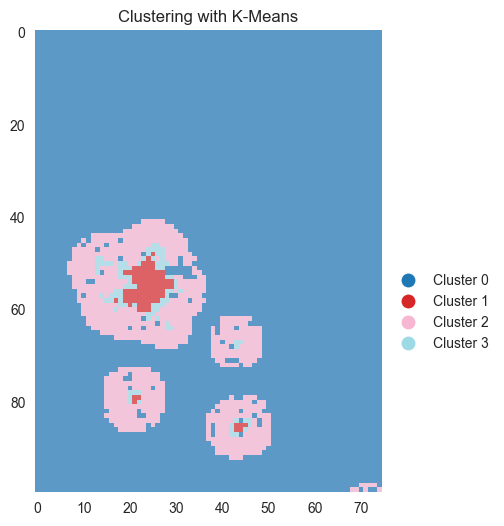

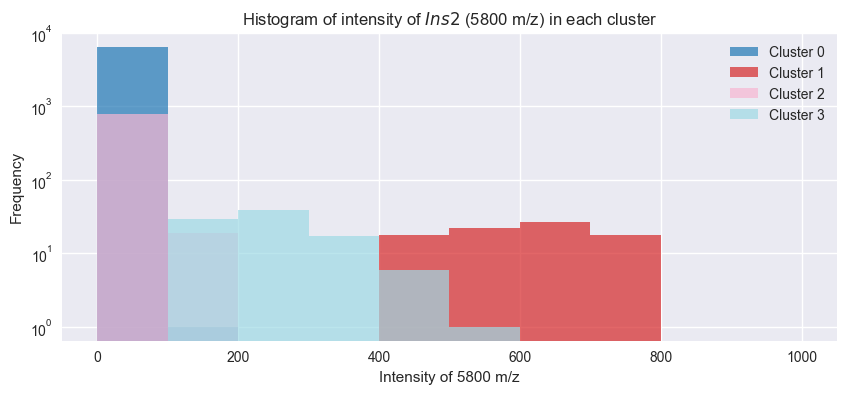

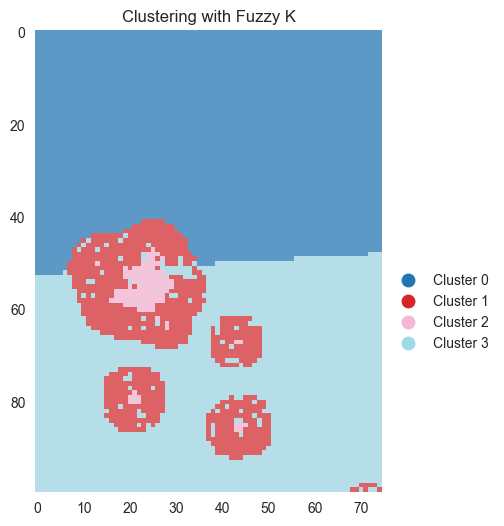

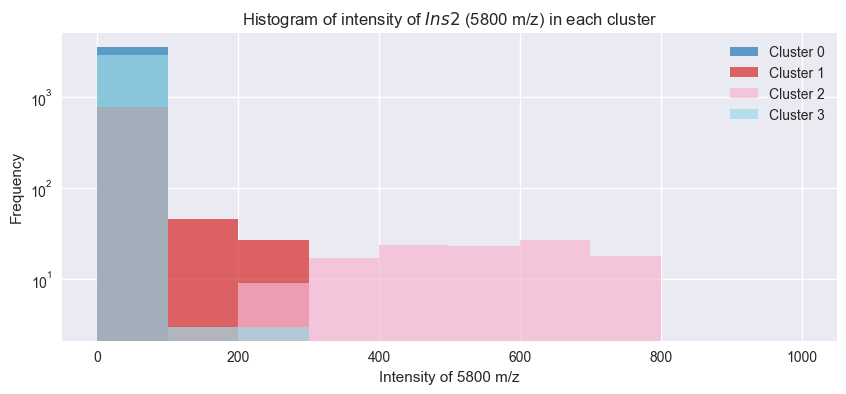

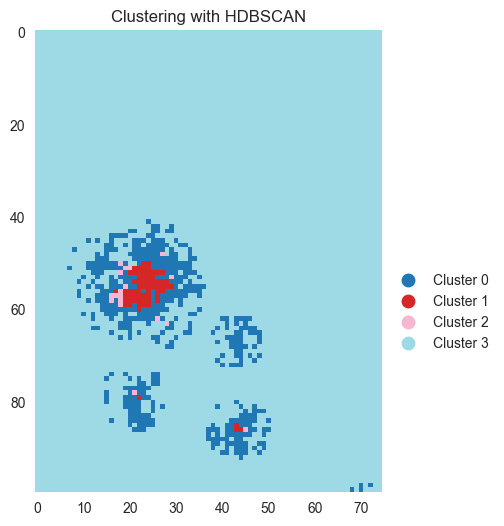

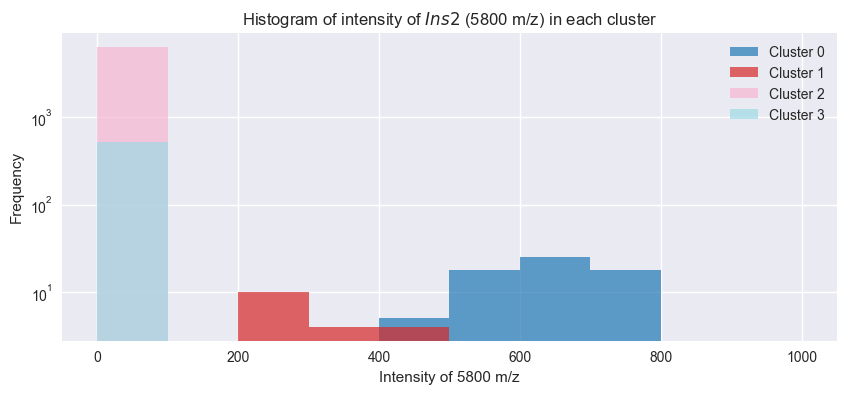

In [25]:
obj.fit_cluster_k_means(num_clusters= 4, plot = True)
obj.fit_cluster_fuzzy_k(num_clusters= 4, plot = True)  
obj.fit_cluster_hdbscan(min_cluster_size = 7, plot = True)

In [45]:
delta_x = x_range[1] - x_range[0]
delta_y = y_range[1] - y_range[0]

In [46]:
map_all_kmeans_2 = np.zeros((delta_x, delta_y))
map_all_fuzzy_2 = np.zeros((delta_x, delta_y))
map_all_hdbscan_2 = np.zeros((delta_x, delta_y))

(70, 70)

In [105]:
indices = obj.data_to_cluster_clustered_hdbscan == 1
map_all_hdbscan_2[indices] = 2
indices = obj.data_to_cluster_clustered_hdbscan == 3
map_all_hdbscan_2[indices] = 1
indices = obj.data_to_cluster_clustered_hdbscan == 0
map_all_hdbscan_2[indices] = 3
indices = obj.data_to_cluster_clustered_hdbscan == 2
map_all_hdbscan_2[indices] = 0
# map_all_hdbscan_2[obj.outside_map] = -1

indices = obj.data_to_cluster_clustered_fuzzyk == 0
map_all_fuzzy_2[indices] = 0
indices = obj.data_to_cluster_clustered_fuzzyk == 3
map_all_fuzzy_2[indices] = 0
indices = obj.data_to_cluster_clustered_fuzzyk == 2
map_all_fuzzy_2[indices] = 3 #
indices = obj.data_to_cluster_clustered_fuzzyk == 1
map_all_fuzzy_2[indices] = 1
# map_all_fuzzy_2[obj.outside_map] = -1

indices = obj.data_to_cluster_clustered_kmeans == 2
map_all_kmeans_2[indices] = 1
indices = obj.data_to_cluster_clustered_kmeans == 3
map_all_kmeans_2[indices] = 3
indices = obj.data_to_cluster_clustered_kmeans == 1
map_all_kmeans_2[indices] = 2
# map_all_kmeans[obj.outside_map] = -1

In [116]:
x_range1 = (0, 70)
y_range1 = (10, 80)

x_range2 = (100,200)
y_range2 = (75,150)


map_kmeans = np.zeros(obj.data[0].shape) + 4
map_fuzzy = np.zeros(obj.data[0].shape) + 4
map_hdbscan = np.zeros(obj.data[0].shape) + 4
map_kmeans[x_range1[0]:x_range1[1], y_range1[0]:y_range1[1]] = map_all_kmeans
map_kmeans[x_range2[0]:x_range2[1], y_range2[0]:y_range2[1]] = map_all_kmeans_2
map_kmeans[obj.outside_map] = -1
map_kmeans[map_kmeans == 4] = 0
map_kmeans[map_kmeans == 2] = 4
map_kmeans[map_kmeans == 3] = 2
map_kmeans[map_kmeans == 4] = 3


map_fuzzy[x_range1[0]:x_range1[1], y_range1[0]:y_range1[1]] = map_all_fuzzy
map_fuzzy[x_range2[0]:x_range2[1], y_range2[0]:y_range2[1]] = map_all_fuzzy_2
map_fuzzy[obj.outside_map] = -1
map_fuzzy[map_fuzzy == 4] = 0

map_hdbscan[x_range1[0]:x_range1[1], y_range1[0]:y_range1[1]] = map_all_hdbscan
map_hdbscan[x_range2[0]:x_range2[1], y_range2[0]:y_range2[1]] = map_all_hdbscan_2
map_hdbscan[obj.outside_map] = -1
map_hdbscan[map_hdbscan == 4] = 0


Text(0.5, 1.0, 'K-means clustering')

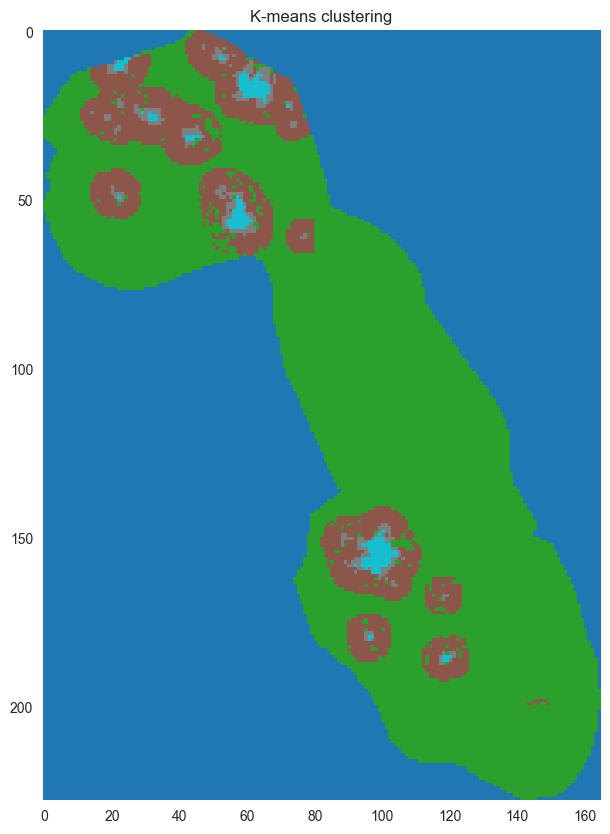

In [137]:
plt.figure(figsize=(10,10))
plt.grid(False)
plt.imshow(map_kmeans, cmap = 'tab10') # 0 --> none, # 1 --> surrounding, # 2 --> islet small insulin, # 3 --> islet high insulin
plt.title('K-means clustering')

In [33]:
np.save('islet_map.npy', map_all)

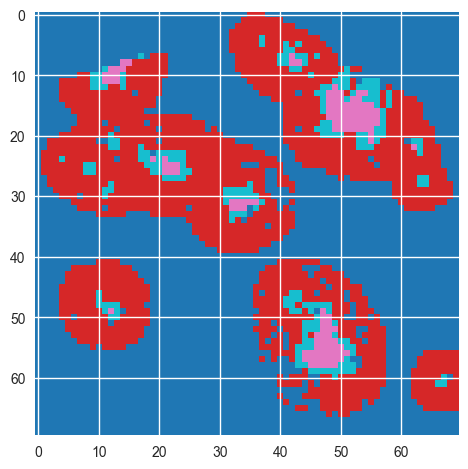

In [121]:
plt.imshow(map_all[0], cmap = 'tab10') # 0 --> none, # 1 --> surrounding, # 2 --> islet in, # 3 --> islet out
plt.imshow(map_all[1], cmap = 'tab10') # 3 --> none, # 2 --> surrounding, # 1 --> islet in, # 0 --> islet out
plt.imshow(map_all[2], cmap = 'tab10') # 3 --> none, # 2 --> surrounding, # 1 --> islet in, # 0 --> islet out

In [132]:
def plot_mean_spectrum(obj, map_all, semilog = True, x_range = (0, 70), y_range = (10, 80)):
    colours = ['b', 'r', 'g', 'y']
    colours = ['#1f77b4', '#ff7f0e', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    fig, axs = plt.subplots(4, 1, figsize=(10,12))
    for cluster_no in range(0,4):
        ax = axs[int(cluster_no)]
        data = obj.data[:, x_range[0]:x_range[1], y_range[0]:y_range[1]]
        arr1 = np.mean(data[:,map_all[0]==cluster_no], axis = 1)
        arr2 = np.mean(data[:,map_all[1]== 3- cluster_no], axis = 1)
        arr3 = np.mean(data[:,map_all[2]==3- cluster_no], axis = 1)
        if semilog:
            ax.semilogy(obj.mz_vector, arr1, '-', color = colours[0], label = 'K-means', linewidth = 2, alpha = 0.5)
            ax.semilogy(obj.mz_vector, arr2, '-', color = colours[1], label = 'Fuzzy K-means', linewidth = 2, alpha = 0.5)
            ax.semilogy(obj.mz_vector, arr3, '-', color = colours[2], label = 'HDBSCAN', linewidth = 2, alpha = 0.5)
            ax.axvline(obj.insulin_1_mz, color = 'k', linestyle = '--', alpha = 0.3, label = '$Ins2$')
        else:
            ax.plot(obj.mz_vector, arr1, '-', color = colours[0], label = 'K-means', linewidth = 2, alpha = 0.5)
            ax.plot(obj.mz_vector, arr2, '-', color = colours[1], label = 'Fuzzy K-means', linewidth = 2, alpha = 0.5)
            ax.plot(obj.mz_vector, arr3, '-', color = colours[2], label = 'HDBSCAN', linewidth = 2, alpha = 0.5)
            ax.axvline(obj.insulin_1_mz, color = 'k', linestyle = '--', alpha = 0.3, label = '$Ins2$')
            
        ax.set_xlabel('m/z')
        ax.set_ylabel('Mean Intensity')
        ax.set_title('Cluster ' + str(int(cluster_no)) + ' Mean Spectrum')
        # ax.set_ylim(0,10**3)
        ax.set_xlim(5500,7000)
        ax.legend()
    plt.suptitle('Mean Spectrum of Clusters')
    plt.tight_layout()

In [128]:
# map_all_fuzzy[map_all_fuzzy == 3] = 4
# map_all_fuzzy[map_all_fuzzy == 1] = 3
# map_all_fuzzy[map_all_fuzzy == 2] = 5
# map_all_fuzzy[map_all_fuzzy == 0] = 2
# map_all_fuzzy[map_all_fuzzy == 4] = 0
# map_all_fuzzy[map_all_fuzzy == 5] = 1


# map_all_fuzzy[map_all_fuzzy == 3] = 0
# map_all_fuzzy[map_all_fuzzy == 4] = 3
# map_all_fuzzy[map_all_fuzzy == 2] = 4
# map_all_fuzzy[map_all_fuzzy == 1] = 2
# map_all_fuzzy[map_all_fuzzy == 4] = 1

# map_all_hdbscan[map_all_hdbscan == 2] = 4
# map_all_hdbscan[map_all_hdbscan == 1] = 2
# map_all_hdbscan[map_all_hdbscan == 3] = 5
# map_all_hdbscan[map_all_hdbscan == 0] = 3
# map_all_hdbscan[map_all_hdbscan == 4] = 1
# map_all_hdbscan[map_all_hdbscan == 5] = 0


# map_all_hdbscan[map_all_hdbscan == 3] = 0
# map_all_hdbscan[map_all_hdbscan == 4] = 3
# map_all_hdbscan[map_all_hdbscan == 2] = 4
# map_all_hdbscan[map_all_hdbscan == 1] = 2
# map_all_hdbscan[map_all_hdbscan == 4] = 1

map_all = [map_all_kmeans, map_all_fuzzy, map_all_hdbscan]

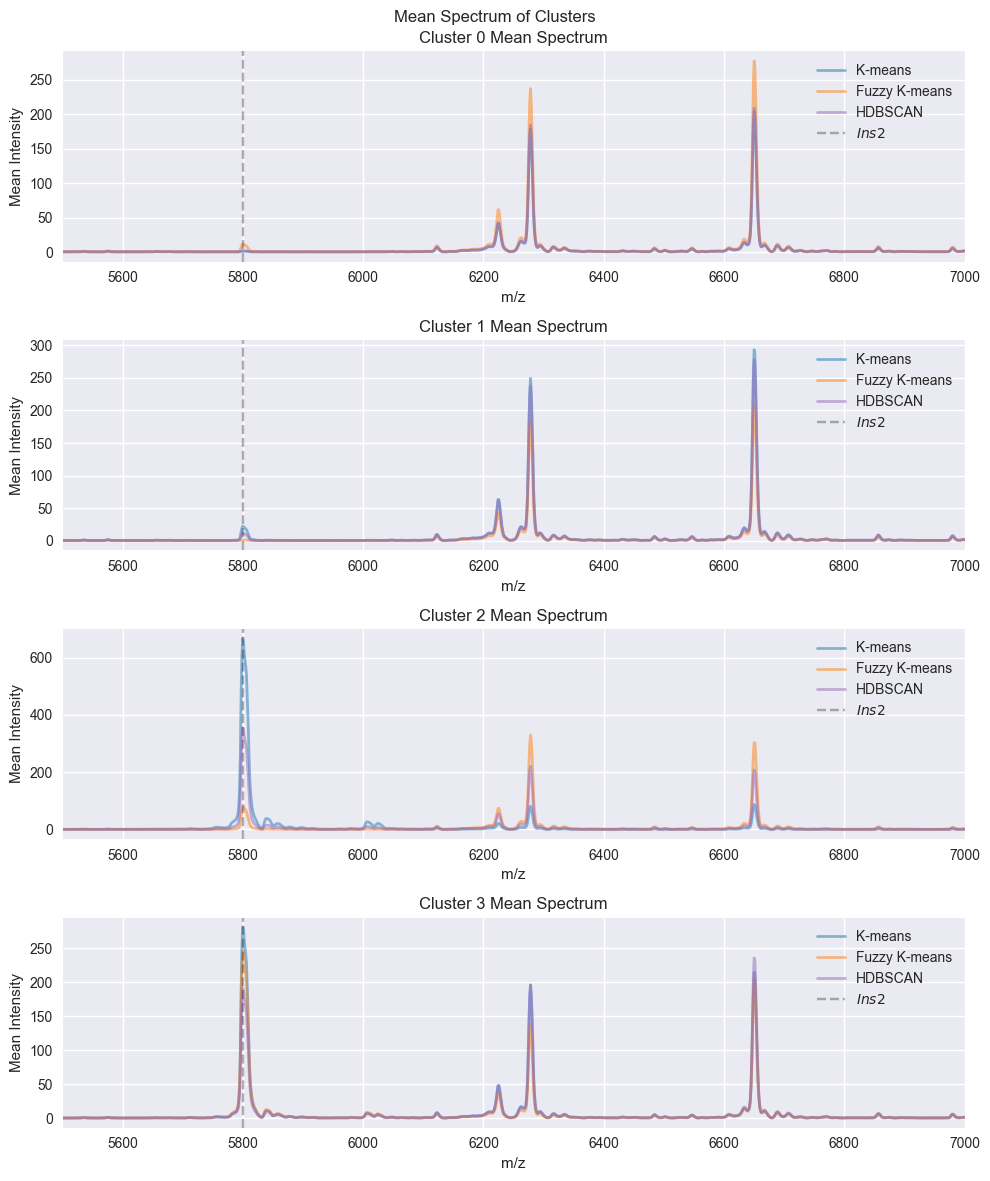

In [133]:
plot_mean_spectrum(obj, map_all, semilog = False)